## Descrição

Realizar uma análise profunda do dataset **"PlayStation Sales and Metadata (PS3, PS4, PS5)"**.

Identificar padrões de mercado, impacto de notas, comportamento de gêneros e diferenças entre gerações.

Produzir insights orientados a negócio, gráficos explicativos e possíveis recomendações estratégicas.

**Fonte dos dados:** Kaggle – PlayStation Sales and Metadata (PS3, PS4, PS5) -
Dados combinados de **VGChartz** e **API RAWG**.

**link:** https://www.kaggle.com/datasets/gvidalguiresse/playstation-sales-and-metadata-ps3ps4ps5?resource=download

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from src import utils
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

In [2]:
# Ativar estilo do seaborn
plt.style.use('seaborn-v0_8-darkgrid')

# Paleta personalizada inspirada no PlayStation
colors = ['#C0392B',  # PS3
          '#2980B9',  # PS4
          '#85C1E9']  # PS5

In [3]:
load_dotenv()
cleaned_data_path = os.getenv('cleaned_data_path')
raw_data_path = os.getenv('raw_data_path')

In [4]:
# Carregando os dados brutos
df = pd.read_csv(f'{raw_data_path}/PlayStation_Metadata.csv')
df.head()

,Game,Console,Name,Publisher,Developer,Total Shipped,Total Sales,NA Sales,PAL Sales,Japan Sales,Other Sales,Release Date,Last Update,rating,ratings_count,metacritic,genres,platforms
0,PS3_Grand Theft Auto V,PS3,Grand Theft Auto V,Rockstar Games,Rockstar North,0.0,20320000.0,6370000.0,9850000.0,990000.0,3120000.0,2013-09-17,NaN,4.47,7225.0,92.0,Action,"PC, PlayStation 5, Xbox One, PlayStation 4, Xb..."
1,PS4_Grand Theft Auto V,PS4,Grand Theft Auto V,Rockstar Games,Rockstar North,0.0,19390000.0,6060000.0,9710000.0,600000.0,3020000.0,2014-11-18,2018-01-03,4.47,7225.0,92.0,Action,"PC, PlayStation 5, Xbox One, PlayStation 4, Xb..."
2,PS4_Call of Duty: Black Ops 3,PS4,Call of Duty: Black Ops 3,Activision,Treyarch,0.0,15090000.0,6180000.0,6050000.0,410000.0,2440000.0,2015-11-06,2018-01-14,NaN,NaN,NaN,NaN,NaN
3,PS4_Red Dead Redemption 2,PS4,Red Dead Redemption 2,Rockstar Games,Rockstar Games,0.0,13940000.0,5260000.0,6210000.0,210000.0,2260000.0,2018-10-26,2018-11-02,4.59,5357.0,96.0,Action,"PC, Xbox One, PlayStation 4"
4,PS3_Call of Duty: Black Ops II,PS3,Call of Duty: Black Ops II,Activision,Treyarch,0.0,13800000.0,4990000.0,5880000.0,650000.0,2280000.0,2012-11-13,NaN,3.96,1417.0,74.0,"Shooter, Action","PC, Xbox One, Xbox 360, PlayStation 3, Wii U"


In [5]:
df.columns

Index(['Game', 'Console', 'Name', 'Publisher', 'Developer', 'Total Shipped',
       'Total Sales', 'NA Sales', 'PAL Sales', 'Japan Sales', 'Other Sales',
       'Release Date', 'Last Update', 'rating', 'ratings_count', 'metacritic',
       'genres', 'platforms'],
      dtype='object')

In [6]:
print(df.shape)
df.isnull().sum()

(4963, 18)


Game                0
Console             0
Name                0
Publisher           0
Developer           0
Total Shipped       0
Total Sales         0
NA Sales            0
PAL Sales           0
Japan Sales         0
Other Sales         0
Release Date     1437
Last Update      2162
rating           2116
ratings_count    2116
metacritic       3433
genres           2160
platforms        2116
dtype: int64

In [7]:
# Verificando recorrerência de valores nulos na coluna 'platforms'
print(df[df['platforms'].isna()].shape)
df[df['platforms'].isna()].head()

(2116, 18)


,Game,Console,Name,Publisher,Developer,Total Shipped,Total Sales,NA Sales,PAL Sales,Japan Sales,Other Sales,Release Date,Last Update,rating,ratings_count,metacritic,genres,platforms
2,PS4_Call of Duty: Black Ops 3,PS4,Call of Duty: Black Ops 3,Activision,Treyarch,0.0,15090000.0,6180000.0,6050000.0,410000.0,2440000.0,2015-11-06,2018-01-14,NaN,NaN,NaN,NaN,NaN
12,PS4_Uncharted 4: A Thief's End,PS4,Uncharted 4: A Thief's End,Sony Interactive Entertainment,Naughty Dog,18650000.0,10330000.0,4490000.0,3930000.0,210000.0,1700000.0,2016-05-10,2018-09-23,NaN,NaN,NaN,NaN,NaN
14,PS4_Call of Duty: Black Ops IIII,PS4,Call of Duty: Black Ops IIII,Activision,Treyarch,0.0,9320000.0,4050000.0,3280000.0,500000.0,1490000.0,2018-10-12,2018-11-07,NaN,NaN,NaN,NaN,NaN
19,PS4_FIFA 16,PS4,FIFA 16,EA Sports,EA Canada,0.0,8220000.0,1150000.0,5770000.0,70000.0,1230000.0,2015-09-22,2018-04-01,NaN,NaN,NaN,NaN,NaN
20,PS4_Star Wars Battlefront (2015),PS4,Star Wars Battlefront (2015),Electronic Arts,EA DICE,0.0,8030000.0,3310000.0,3190000.0,230000.0,1300000.0,2015-11-17,2018-03-24,NaN,NaN,NaN,NaN,NaN


In [8]:
# Analisando valores nulos na coluna 'platforms' para o jogo específico
df[(df['Name'] == "Tom Clancy's Rainbow Six: Siege") & (df['platforms'].isna())]

,Game,Console,Name,Publisher,Developer,Total Shipped,Total Sales,NA Sales,PAL Sales,Japan Sales,Other Sales,Release Date,Last Update,rating,ratings_count,metacritic,genres,platforms
56,PS4_Tom Clancy's Rainbow Six: Siege,PS4,Tom Clancy's Rainbow Six: Siege,Ubisoft,Ubisoft Montreal,0.0,4360000.0,1290000.0,2060000.0,360000.0,640000.0,2015-12-01,2024-02-02,NaN,NaN,NaN,NaN,NaN
2535,PS5_Tom Clancy's Rainbow Six: Siege,PS5,Tom Clancy's Rainbow Six: Siege,Ubisoft,Ubisoft Montreal,0.0,0.0,0.0,0.0,0.0,0.0,2020-12-01,2020-06-17,NaN,NaN,NaN,NaN,NaN


## 🧹 Tratamento e Preparação dos Dados

Durante a etapa de limpeza e preparação, foram identificados pontos de inconsistência e colunas com baixa relevância analítica. As decisões abaixo foram adotadas para garantir um conjunto de dados mais confiável e coerente para as análises.

- **🗂️ Remoção das colunas “platforms” e “Last Update”**
    - Com taxas de ausência de 42,63% e 43,56%, respectivamente, essas colunas não agregavam valor às comparações entre gerações. A coluna “Console”, já consistente, foi mantida como referência primária.

- **📉 Descarte da coluna “metacritic”**
    - Com aproximadamente 70% de valores ausentes, a coluna inviabilizava análises estatísticas robustas. Como “rating” e “ratings_count” já representam bem a percepção dos usuários, optou-se por removê-la para evitar vieses.

- **🔑 Remoção da coluna “Game”**
    - Por ser um identificador único, não contribui para análises comparativas, correlações ou métricas estatísticas, sendo descartada.

- **📅 Tratamento de “Release Date”**
    - Essencial para análises temporais, essa coluna teve seus valores ausentes substituídos por “Unknown Date”, preservando a consistência da base sem distorcer tendências.

- **🎭 Tratamento de “genres”**
    - Apesar da ausência relativamente alta (~44%), sua importância para segmentações e análises descritivas justificou sua manutenção. Os valores nulos foram substituídos por “Unknown”.

- **⚙️ Criação da coluna “Has Score”**
    - Uma variável binária derivada de “rating” e “ratings_count”, permitindo isolar rapidamente jogos avaliados (1) e não avaliados (0).

Essas decisões fortaleceram a integridade da base e permitiram que as análises seguintes fossem conduzidas de forma mais clara e interpretável.

In [9]:
# Excluindo colunas com muitos valores nulos
# 'platforms', 'Last Update', 'metacritic'
df_all = df.drop(['platforms', 'Last Update', 'metacritic', 'Game'], axis=1).copy()
print(df_all.shape)
df_all.isnull().sum()

(4963, 14)


Console             0
Name                0
Publisher           0
Developer           0
Total Shipped       0
Total Sales         0
NA Sales            0
PAL Sales           0
Japan Sales         0
Other Sales         0
Release Date     1437
rating           2116
ratings_count    2116
genres           2160
dtype: int64

In [10]:
df_all.head()

,Console,Name,Publisher,Developer,Total Shipped,Total Sales,NA Sales,PAL Sales,Japan Sales,Other Sales,Release Date,rating,ratings_count,genres
0,PS3,Grand Theft Auto V,Rockstar Games,Rockstar North,0.0,20320000.0,6370000.0,9850000.0,990000.0,3120000.0,2013-09-17,4.47,7225.0,Action
1,PS4,Grand Theft Auto V,Rockstar Games,Rockstar North,0.0,19390000.0,6060000.0,9710000.0,600000.0,3020000.0,2014-11-18,4.47,7225.0,Action
2,PS4,Call of Duty: Black Ops 3,Activision,Treyarch,0.0,15090000.0,6180000.0,6050000.0,410000.0,2440000.0,2015-11-06,NaN,NaN,NaN
3,PS4,Red Dead Redemption 2,Rockstar Games,Rockstar Games,0.0,13940000.0,5260000.0,6210000.0,210000.0,2260000.0,2018-10-26,4.59,5357.0,Action
4,PS3,Call of Duty: Black Ops II,Activision,Treyarch,0.0,13800000.0,4990000.0,5880000.0,650000.0,2280000.0,2012-11-13,3.96,1417.0,"Shooter, Action"


In [11]:
# Preenchendo valores nulos na coluna 'Release Date' com 'Unknown Date'
# para evitar problemas em análises futuras
df_all['Release Date'] = df_all['Release Date'].fillna('Unknown Date')
print(df_all['Release Date'].dtype)
df_all.head()

object


,Console,Name,Publisher,Developer,Total Shipped,Total Sales,NA Sales,PAL Sales,Japan Sales,Other Sales,Release Date,rating,ratings_count,genres
0,PS3,Grand Theft Auto V,Rockstar Games,Rockstar North,0.0,20320000.0,6370000.0,9850000.0,990000.0,3120000.0,2013-09-17,4.47,7225.0,Action
1,PS4,Grand Theft Auto V,Rockstar Games,Rockstar North,0.0,19390000.0,6060000.0,9710000.0,600000.0,3020000.0,2014-11-18,4.47,7225.0,Action
2,PS4,Call of Duty: Black Ops 3,Activision,Treyarch,0.0,15090000.0,6180000.0,6050000.0,410000.0,2440000.0,2015-11-06,NaN,NaN,NaN
3,PS4,Red Dead Redemption 2,Rockstar Games,Rockstar Games,0.0,13940000.0,5260000.0,6210000.0,210000.0,2260000.0,2018-10-26,4.59,5357.0,Action
4,PS3,Call of Duty: Black Ops II,Activision,Treyarch,0.0,13800000.0,4990000.0,5880000.0,650000.0,2280000.0,2012-11-13,3.96,1417.0,"Shooter, Action"


In [12]:
# Preenchendo valores nulos na coluna 'genres' com 'Unknown'
# evitando problemas em análises futuras
df_all['genres'] = df_all['genres'].fillna('Unknown')
df_all.head()

,Console,Name,Publisher,Developer,Total Shipped,Total Sales,NA Sales,PAL Sales,Japan Sales,Other Sales,Release Date,rating,ratings_count,genres
0,PS3,Grand Theft Auto V,Rockstar Games,Rockstar North,0.0,20320000.0,6370000.0,9850000.0,990000.0,3120000.0,2013-09-17,4.47,7225.0,Action
1,PS4,Grand Theft Auto V,Rockstar Games,Rockstar North,0.0,19390000.0,6060000.0,9710000.0,600000.0,3020000.0,2014-11-18,4.47,7225.0,Action
2,PS4,Call of Duty: Black Ops 3,Activision,Treyarch,0.0,15090000.0,6180000.0,6050000.0,410000.0,2440000.0,2015-11-06,NaN,NaN,Unknown
3,PS4,Red Dead Redemption 2,Rockstar Games,Rockstar Games,0.0,13940000.0,5260000.0,6210000.0,210000.0,2260000.0,2018-10-26,4.59,5357.0,Action
4,PS3,Call of Duty: Black Ops II,Activision,Treyarch,0.0,13800000.0,4990000.0,5880000.0,650000.0,2280000.0,2012-11-13,3.96,1417.0,"Shooter, Action"


In [13]:
# Criando coluna binária indicando se o jogo possui avaliação (rating) e número de avaliações (ratings_count)
df_all['Has Score'] = (df_all['rating'].notnull() & df_all['ratings_count'].notnull()).astype(int)
df_all.head()

,Console,Name,Publisher,Developer,Total Shipped,Total Sales,NA Sales,PAL Sales,Japan Sales,Other Sales,Release Date,rating,ratings_count,genres,Has Score
0,PS3,Grand Theft Auto V,Rockstar Games,Rockstar North,0.0,20320000.0,6370000.0,9850000.0,990000.0,3120000.0,2013-09-17,4.47,7225.0,Action,1
1,PS4,Grand Theft Auto V,Rockstar Games,Rockstar North,0.0,19390000.0,6060000.0,9710000.0,600000.0,3020000.0,2014-11-18,4.47,7225.0,Action,1
2,PS4,Call of Duty: Black Ops 3,Activision,Treyarch,0.0,15090000.0,6180000.0,6050000.0,410000.0,2440000.0,2015-11-06,NaN,NaN,Unknown,0
3,PS4,Red Dead Redemption 2,Rockstar Games,Rockstar Games,0.0,13940000.0,5260000.0,6210000.0,210000.0,2260000.0,2018-10-26,4.59,5357.0,Action,1
4,PS3,Call of Duty: Black Ops II,Activision,Treyarch,0.0,13800000.0,4990000.0,5880000.0,650000.0,2280000.0,2012-11-13,3.96,1417.0,"Shooter, Action",1


In [14]:
# Renomeando colunas para melhor legibilidade
columns = {
    'rating': 'Rating',
    'ratings_count': 'Ratings Count',
    'genres': 'Genres'
}

df_all = df_all.rename(columns=columns)
df_all.head()

,Console,Name,Publisher,Developer,Total Shipped,Total Sales,NA Sales,PAL Sales,Japan Sales,Other Sales,Release Date,Rating,Ratings Count,Genres,Has Score
0,PS3,Grand Theft Auto V,Rockstar Games,Rockstar North,0.0,20320000.0,6370000.0,9850000.0,990000.0,3120000.0,2013-09-17,4.47,7225.0,Action,1
1,PS4,Grand Theft Auto V,Rockstar Games,Rockstar North,0.0,19390000.0,6060000.0,9710000.0,600000.0,3020000.0,2014-11-18,4.47,7225.0,Action,1
2,PS4,Call of Duty: Black Ops 3,Activision,Treyarch,0.0,15090000.0,6180000.0,6050000.0,410000.0,2440000.0,2015-11-06,NaN,NaN,Unknown,0
3,PS4,Red Dead Redemption 2,Rockstar Games,Rockstar Games,0.0,13940000.0,5260000.0,6210000.0,210000.0,2260000.0,2018-10-26,4.59,5357.0,Action,1
4,PS3,Call of Duty: Black Ops II,Activision,Treyarch,0.0,13800000.0,4990000.0,5880000.0,650000.0,2280000.0,2012-11-13,3.96,1417.0,"Shooter, Action",1


In [15]:
# Verificando duplicatas no DataFrame
print(df_all.shape)
print(df_all.duplicated(keep=False).value_counts())

(4963, 15)
False    4963
Name: count, dtype: int64


In [16]:
# Categorias derivadas de metascore
print(df_all['Rating'].min(), df_all['Rating'].max())

df_all = utils.set_rating_category(df=df_all, column='Rating')

df_all.head()

0.0 4.76


,Console,Name,Publisher,Developer,Total Shipped,Total Sales,NA Sales,PAL Sales,Japan Sales,Other Sales,Release Date,Rating,Ratings Count,Genres,Has Score,Rating Category
0,PS3,Grand Theft Auto V,Rockstar Games,Rockstar North,0.0,20320000.0,6370000.0,9850000.0,990000.0,3120000.0,2013-09-17,4.47,7225.0,Action,1,Excelente
1,PS4,Grand Theft Auto V,Rockstar Games,Rockstar North,0.0,19390000.0,6060000.0,9710000.0,600000.0,3020000.0,2014-11-18,4.47,7225.0,Action,1,Excelente
2,PS4,Call of Duty: Black Ops 3,Activision,Treyarch,0.0,15090000.0,6180000.0,6050000.0,410000.0,2440000.0,2015-11-06,NaN,NaN,Unknown,0,Sem Avaliação
3,PS4,Red Dead Redemption 2,Rockstar Games,Rockstar Games,0.0,13940000.0,5260000.0,6210000.0,210000.0,2260000.0,2018-10-26,4.59,5357.0,Action,1,Excelente
4,PS3,Call of Duty: Black Ops II,Activision,Treyarch,0.0,13800000.0,4990000.0,5880000.0,650000.0,2280000.0,2012-11-13,3.96,1417.0,"Shooter, Action",1,Bom


In [17]:
# Converter 'Release Date' para data (sem hora), mantendo 'Unknown Date' como string
orig = df_all['Release Date'].copy()

# Tenta converter para datetime; entradas inválidas virarão NaT
parsed = pd.to_datetime(orig, errors='coerce')

# Substitui por date (sem hora) quando conversão bem sucedida; caso contrário mantém o valor original (ex: 'Unknown Date')
df_all['Release Date'] = parsed.dt.date.where(parsed.notna(), orig)

# Verificação rápida
print(df_all['Release Date'].head())
print(df_all['Release Date'].dtype)

0    2013-09-17
1    2014-11-18
2    2015-11-06
3    2018-10-26
4    2012-11-13
Name: Release Date, dtype: object
object


In [18]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4963 entries, 0 to 4962
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Console          4963 non-null   object 
 1   Name             4963 non-null   object 
 2   Publisher        4963 non-null   object 
 3   Developer        4963 non-null   object 
 4   Total Shipped    4963 non-null   float64
 5   Total Sales      4963 non-null   float64
 6   NA Sales         4963 non-null   float64
 7   PAL Sales        4963 non-null   float64
 8   Japan Sales      4963 non-null   float64
 9   Other Sales      4963 non-null   float64
 10  Release Date     4963 non-null   object 
 11  Rating           2847 non-null   float64
 12  Ratings Count    2847 non-null   float64
 13  Genres           4963 non-null   object 
 14  Has Score        4963 non-null   int64  
 15  Rating Category  4963 non-null   object 
dtypes: float64(8), int64(1), object(7)
memory usage: 620.5+ KB


## ⭐ Categorias de Avaliação (Rating)

Para facilitar a interpretação das avaliações dos jogos, foram criadas categorias derivadas da coluna **“rating”**, permitindo segmentar o catálogo de forma mais intuitiva e moderna.

As classificações adotadas foram:
- 🟩 **Excelente — nota ≥ 4.0**
- 🟦 **Bom — 3.0 ≤ nota < 3.9**
- 🟨 **Regular — 2.0 ≤ nota < 2.9**
- 🟥 **Ruim — nota < 2.0**
- 🟪 **Sem Avaliação — jogos que não possuem nota registrada**

Essa segmentação torna a análise mais visual e objetiva, facilitando a identificação de padrões de qualidade, variações entre gerações e possíveis relações entre notas e desempenho comercial.

In [19]:
# Salvando o DataFrame tratado em um novo arquivo CSV
df_all.to_csv(f'{cleaned_data_path}/PlayStation_Metadata_treated.csv', index=False)

In [20]:
# Vendas totais por console PlayStation
df_all.groupby('Console')['Total Sales'].sum().sort_values(ascending=False)

Console
PS3    839660000.0
PS4    653660000.0
PS5            0.0
Name: Total Sales, dtype: float64

In [21]:
# Vendas totais nos console PS3 e PS4
df_sales = df_all[df_all['Console'].isin(['PS3', 'PS4'])]
df_sales.groupby('Console')['Total Sales'].sum().sort_values(ascending=False)

Console
PS3    839660000.0
PS4    653660000.0
Name: Total Sales, dtype: float64

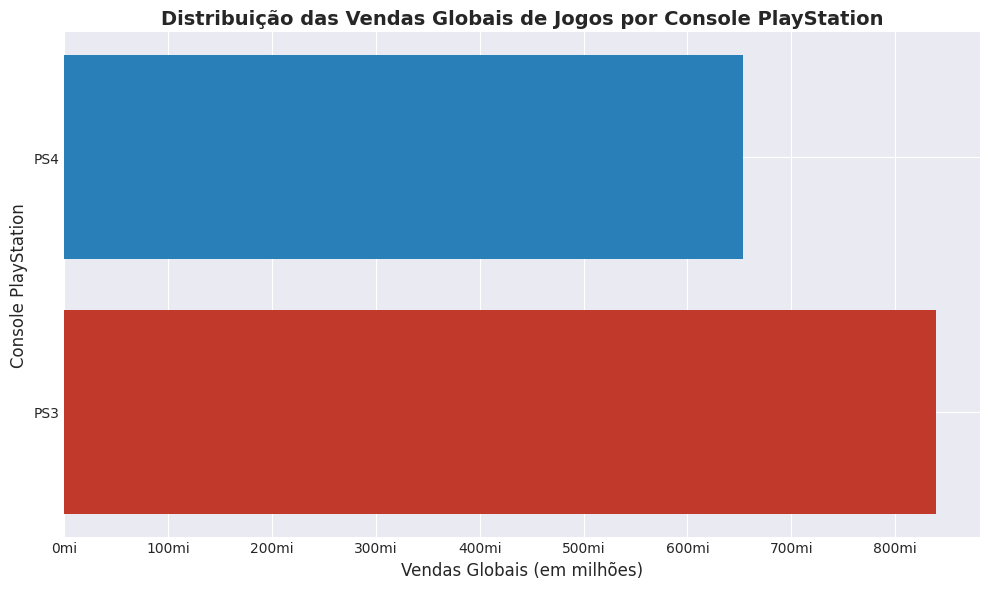

In [22]:
# Visualizando a distribuição das vendas globais de jogos nos consoles

plt.figure(figsize=(10, 6))

# Vendas globais por console PlayStation
sales_console = df_sales.groupby('Console')['Total Sales'].sum().sort_values(ascending=False)

# Gráfico de barras horizontal
plt.barh(
    sales_console.index, 
    sales_console.values, 
    color=colors
)

# Título do gráfico
plt.title(
    'Distribuição das Vendas Globais de Jogos por Console PlayStation',
    fontsize=14,
    fontweight='bold'
)

# Desativa notação científica
plt.ticklabel_format(style='plain', axis='x')

# Formata como milhões
plt.gca().xaxis.set_major_formatter(
    mticker.FuncFormatter(lambda x, pos: f'{x/1e6:.0f}mi')
)

# Rótulos dos eixos
plt.xlabel('Vendas Globais (em milhões)', fontsize=12)
plt.ylabel('Console PlayStation', fontsize=12)

# Layout mais ajustado
plt.tight_layout()

# Salvando o gráfico
plt.savefig(f'{cleaned_data_path}/sales_by_console.png',bbox_inches='tight')

plt.show()

In [23]:
# Análise das médias de vendas por console
sales_mean_by_console = df_sales.groupby('Console')['Total Sales'].mean().sort_values(ascending=False).round(2)
print(sales_mean_by_console)

Console
PS3    443794.93
PS4    328307.38
Name: Total Sales, dtype: float64


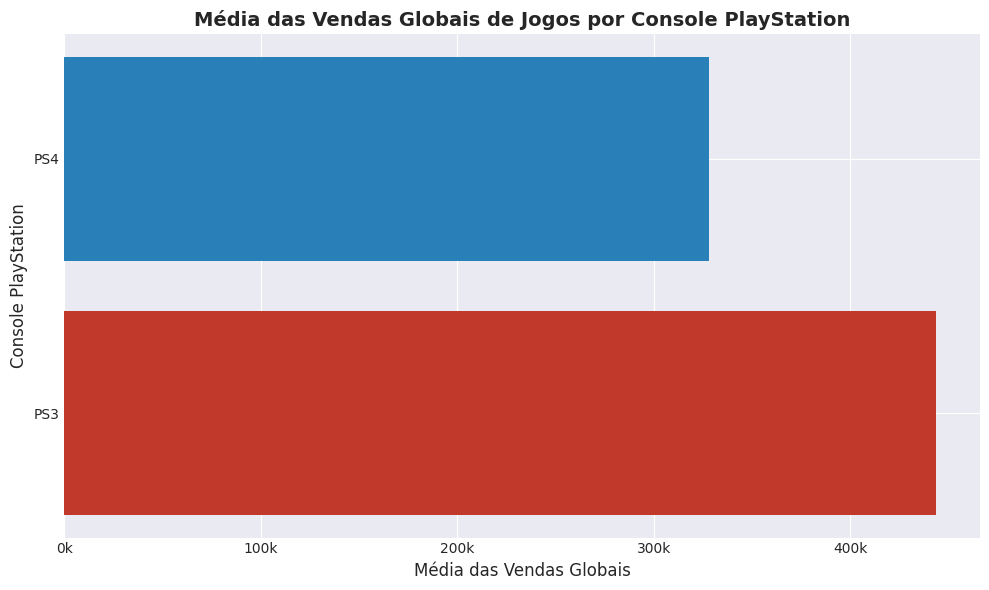

In [24]:
# Visualizando a média das vendas globais de jogos por console PlayStation

plt.figure(figsize=(10, 6))

# Gráfico de barras horizontal
plt.barh(
    sales_mean_by_console.index, 
    sales_mean_by_console.values, 
    color=colors
)

# Título do gráfico
plt.title(
    'Média das Vendas Globais de Jogos por Console PlayStation',
    fontsize=14,
    fontweight='bold'
)

# Desativa notação científica
plt.ticklabel_format(style='plain', axis='x')

# Formata como milhares
plt.gca().xaxis.set_major_formatter(
    mticker.FuncFormatter(lambda x, pos: f'{x/1e3:.0f}k')
)

# Rótulos dos eixos
plt.xlabel('Média das Vendas Globais', fontsize=12)
plt.ylabel('Console PlayStation', fontsize=12)

# Layout mais ajustado
plt.tight_layout()

# Salvando o gráfico
plt.savefig(f'{cleaned_data_path}/average_sales_by_console.png', bbox_inches='tight')

plt.show()

## 🔎 Considerações sobre dados de vendas

**Nota:** Os dados de vendas do PS5 não estão completos no dataset, portanto foram excluídos das análises que envolvem volume de vendas para evitar conclusões distorcidas.

In [25]:
# Distribuição de jogos lançados por console PlayStation
df_all['Console'].value_counts(ascending=True)

Console
PS5    1080
PS3    1892
PS4    1991
Name: count, dtype: int64

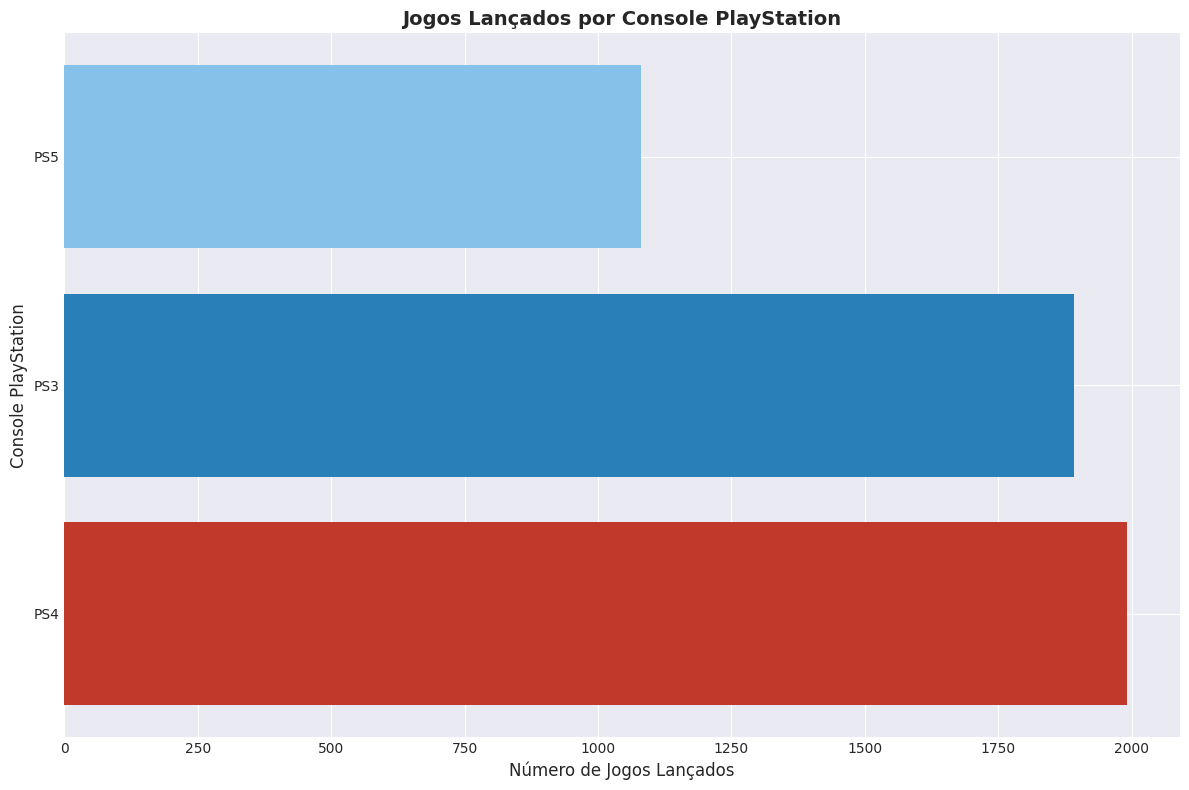

In [26]:
# Visualizando a distribuição dos lançamentos de jogos por console PlayStation

plt.figure(figsize=(12, 8))

# Contagem de jogos por console
games_per_console = df_all['Console'].value_counts().sort_values(ascending=False)

# Gráfico de barras horizontal
plt.barh(
    games_per_console.index, 
    games_per_console.values, 
    color=colors
)

# Título do gráfico
plt.title(
    'Jogos Lançados por Console PlayStation',
    fontsize=14,
    fontweight='bold'
)

# Rótulos dos eixos
plt.xlabel('Número de Jogos Lançados', fontsize=12)
plt.ylabel('Console PlayStation', fontsize=12)

# Layout mais ajustado
plt.tight_layout()

# Salvando o gráfico
plt.savefig(f'{cleaned_data_path}/games_by_console.png', bbox_inches='tight')

plt.show()

In [27]:
# Top 10 gêneros mais bem avaliados entre os jogos com avaliação
top_genres = (df_all[df_all['Has Score'] == 1].groupby('Genres')['Rating'].mean().sort_values(ascending=False).head(10))

print(top_genres)

Genres
Shooter, Puzzle                                             4.58
Action, Arcade, Simulation, Indie, Massively Multiplayer    4.43
Indie, RPG, Simulation                                      4.40
Shooter, Platformer, Action, RPG                            4.34
Strategy, Adventure, Action                                 4.33
Family, Adventure, Puzzle                                   4.33
Indie, Strategy, Adventure, Puzzle                          4.28
Strategy, Arcade, Puzzle                                    4.26
Strategy, Action, RPG, Simulation                           4.23
Action, Casual, Strategy, Simulation, Family, Indie         4.21
Name: Rating, dtype: float64


In [28]:
rating_categories = df_all['Rating Category'].value_counts().reindex(['Excelente', 'Bom', 'Regular', 'Ruim', 'Sem Avaliação'])

print(rating_categories)

Rating Category
Excelente         491
Bom              1357
Regular           366
Ruim              633
Sem Avaliação    2116
Name: count, dtype: int64


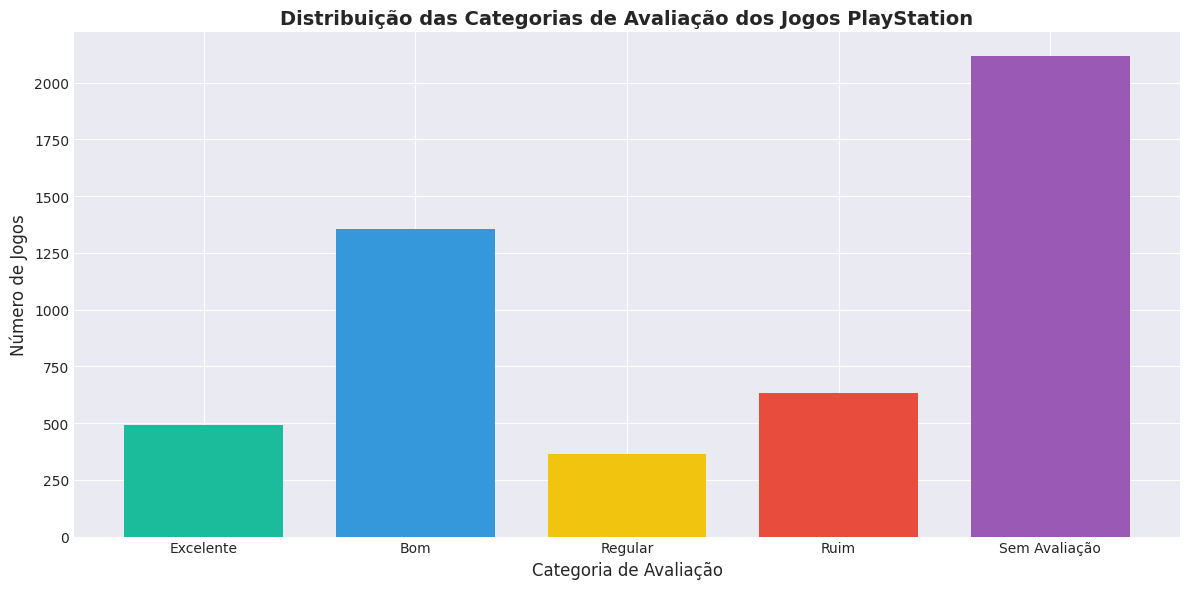

In [29]:
# Visualizando a distribuição das categorias de avaliação dos jogos PlayStation
# (Excelente, Bom, Regular, Ruim, Sem Avaliação)
# Paleta personalizada inspirada no PlayStation
colors_category = ['#1ABC9C',
                   '#3498DB',
                   '#F1C40F',
                   '#E74C3C',
                   '#9B59B6']


plt.figure(figsize=(12, 6))

# Média das vendas globais por console PlayStation
rating_categories = df_all['Rating Category'].value_counts().reindex(['Excelente', 'Bom', 'Regular', 'Ruim', 'Sem Avaliação'])

# Gráfico de barras vertical
plt.bar(
    rating_categories.index, 
    rating_categories.values, 
    color=colors_category,
    width=0.75
)

# Título do gráfico
plt.title(
    'Distribuição das Categorias de Avaliação dos Jogos PlayStation',
    fontsize=14,
    fontweight='bold'
)

# Rótulos dos eixos
plt.xlabel('Categoria de Avaliação', fontsize=12)
plt.ylabel('Número de Jogos', fontsize=12)

# Layout mais ajustado
plt.tight_layout()

# Salvando o gráfico
plt.savefig(f'{cleaned_data_path}/rating_categories_distribution.png', bbox_inches='tight')

plt.show()

In [30]:
# Identificação de outliers interessantes
outliers = df_all[(df_all['Rating'] >= 4.5) & (df_all['Total Sales'] < 0.1)]

outliers[['Name', 'Console', 'Rating', 'Total Sales', 'Ratings Count']].sort_values(by='Rating', ascending=False)

,Name,Console,Rating,Total Sales,Ratings Count
4486,Persona 5 Royal,PS4,4.76,0.0,507.0
2838,Cyberpunk 2077: Phantom Liberty,PS5,4.71,0.0,385.0
2467,The Binding of Isaac: Repentance,PS5,4.68,0.0,121.0
2575,The Last of Us Part I,PS5,4.66,0.0,511.0
3320,Clair Obscur: Expedition 33,PS5,4.61,0.0,249.0
3055,Ghost of Tsushima Director's Cut,PS5,4.58,0.0,298.0
4542,Ghost of Tsushima Director's Cut,PS4,4.58,0.0,298.0
2754,Dragon Ball: Sparking! Zero,PS5,4.56,0.0,9.0
3474,The Last of Us,PS3,4.54,0.0,3280.0
2693,Unicorn Overlord,PS5,4.52,0.0,18.0


In [31]:
outliers2 = df_all[(df_all['Rating'] < 1.0) & (df_all['Total Sales'] > 1.0)]

outliers2[['Name', 'Console', 'Rating', 'Total Sales', 'Ratings Count']].sort_values(by='Total Sales', ascending=False)

,Name,Console,Rating,Total Sales,Ratings Count
248,Ridge Racer 7,PS3,0.0,1370000.0,3.0
390,SingStar Abba,PS3,0.0,930000.0,1.0
395,BUZZ! Quiz World,PS3,0.0,920000.0,3.0
413,God of War Saga,PS3,0.0,890000.0,1.0
415,The Tomb Raider Trilogy,PS3,0.0,890000.0,5.0
...,...,...,...,...,...
2115,Wordhunters,PS4,0.0,10000.0,0.0
2116,Hyperdimension Neptunia mk2,PS3,0.0,10000.0,5.0
2222,Derby Time Online,PS3,0.0,10000.0,0.0
2231,Disorder 6,PS3,0.0,10000.0,0.0


## 🔍 Análise de Outliers Identificados

Durante a análise da relação entre avaliações e vendas, foram identificados outliers em todas as gerações, mas especialmente no PS5. 
Isso ocorre porque os dados de vendas do PS5 são parciais, já que a coleta só vai até outubro de 2025 — ainda nos primeiros anos de vida do console.

Mesmo assim, é possível interpretar esses pontos atípicos com cautela.

## 🎮 Outliers no PS5

Foram observados jogos com **avaliações muito altas (acima de 4.5)**, mas com **vendas extremamente baixas (abaixo de 0.1 milhão)**.

Esses casos são explicados principalmente por:
- Dados de vendas incompletos ou ainda não consolidados.
- Jogos recém-lançados, com pouco tempo para acumular vendas.
- Títulos de nicho, bem avaliados por um público específico, mas sem grande alcance.
- Possíveis limitações de marketing ou distribuição.

Devido às limitações naturais da base, **os outliers do PS5 devem ser interpretados com prudência**, já que não refletem necessariamente o desempenho real desses jogos no longo prazo.

## 🎮 Outliers no PS3 e PS4

Para PS3 e PS4 — que possuem dados muito mais completos — os outliers incluem:

- **Jogos bem avaliados, mas com vendas baixas, geralmente:**
    - obras de nicho.
    - lançamentos tardios.
    - títulos sem grande campanha de marketing.

- **Jogos mal avaliados (notas abaixo de 1.0), mas com vendas altas, frequentemente associados a:**
    - franquias famosas que vendem pelo nome.
    - marketing agressivo.
    - modismos temporários.
    - períodos de pouca concorrência.

- Eventuais inconsistências de coleta, como notas ou vendas incorretamente registradas.

## 📌 Conclusão

Os outliers encontrados reforçam que o sucesso comercial de um jogo vai muito além da sua qualidade intrínseca.

Fatores como:
- marketing.
- força da marca.
- timing de lançamento
- tamanho do público-alvo.
- disponibilidade multiplataforma.

impactam profundamente seu desempenho.

Além disso, a análise evidencia a diferença entre gerações:

- PS3 e PS4 têm dados suficientemente robustos para interpretações sólidas.
- PS5 exige mais cuidado, pois ainda não possui histórico completo de vendas.

In [32]:
# Comparação entre as gerações de consoles PlayStation em tremos de avaliações médias
# (Excelente, Bom, Regular, Ruim)
order = ['Excelente', 'Bom', 'Regular', 'Ruim']
avg_rating_by_console = df_all[df_all['Has Score'] == 1].groupby(['Console', 'Rating Category']).size().unstack(fill_value=0)
avg_rating_by_console = avg_rating_by_console.reindex(columns=order)
print(avg_rating_by_console)

Rating Category  Excelente  Bom  Regular  Ruim
Console                                       
PS3                    165  505      146   296
PS4                    208  633      168   248
PS5                    118  219       52    89


<Figure size 1200x600 with 0 Axes>

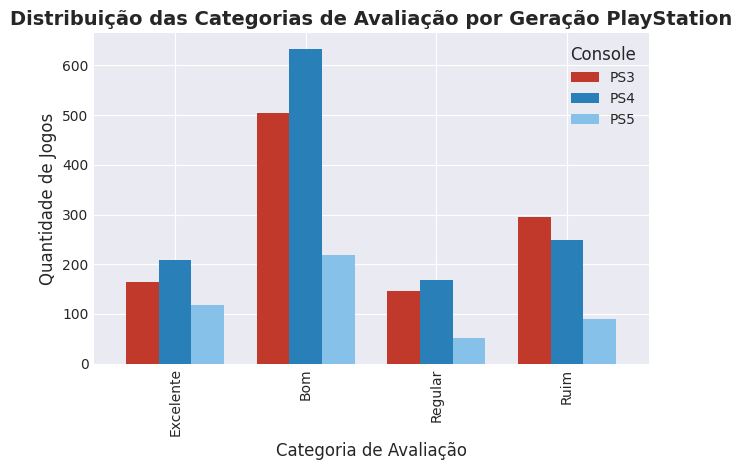

In [33]:
# Visualizando a distribuição das categorias de avaliações medias por console PlayStation
# # Paleta de cores neon inspirada no PlayStation
# colors = [
#     '#E74C3C',  # PS3 - Vermelho neon
#     '#3498DB',  # PS4 - Azul neon
#     '#9B59B6'   # PS5 - Roxo neon
# ]

plt.figure(figsize=(12, 6))

# Plot transposto para categorias no eixo X
avg_rating_by_console.T.plot(
    kind='bar',
    color=colors,
    width=0.75
)

# Título do gráfico
plt.title(
    'Distribuição das Categorias de Avaliação por Geração PlayStation',
    fontsize=14,
    fontweight='bold'
)

# Rótulos dos eixos
plt.xlabel('Categoria de Avaliação', fontsize=12)
plt.ylabel('Quantidade de Jogos', fontsize=12)

# Legenda
plt.legend(
    title='Console',
    title_fontsize=12,
    fontsize=10
)

# Layout mais ajustado
plt.tight_layout()

# Salvando o gráfico
plt.savefig(f'{cleaned_data_path}/rating_categories_by_console.png', bbox_inches='tight')

plt.show()

## 🧠 RESUMO GERAL DA ANÁLISE — PLAYSTATION SALES AND METADATA

Durante a análise da base "PlayStation Sales and Metadata (PS3, PS4, PS5)", foram realizados diversos procedimentos de limpeza, tratamento e estruturação para aprimorar a qualidade das informações e possibilitar insights mais claros e consistentes.

- **🧹 Limpeza, preparação e engenharia de dados**
    - Remoção de colunas com alta taxa de dados nulos ou irrelevantes para análise: **platforms, Last Update, metacritic e Game**.
    - Preenchimento das colunas **"Release Date"** e **"genres"** com valores padrão (**"Unknown Date"** e **"Unknown"**, respectivamente), devido à sua relevância para análises temporais e descritivas.
    - Criação da coluna binária **"Has Score"** para agilizar o filtro entre jogos avaliados e não avaliados.
    - Definição de categorias qualitativas de avaliação (**Excelente, Bom, Regular, Ruim, Sem Avaliação**) derivadas da coluna _rating_, facilitando segmentações comparativas entre gerações.

- **🔎 Análises e visualizações realizadas**
    - **Vendas:** análise do volume focada em **PS3** e **PS4**, já que os dados do **PS5** estão incompletos. Inclui métricas de vendas totais, médias por console e variações entre títulos.
    - Distribuição de lançamentos por console ao longo dos anos.
    - Análise dos **gêneros mais populares** entre os jogos avaliados.

- **🎮 Outliers identificados** 
    - Títulos com **notas altas e vendas baixas**, indicando possíveis jogos de nicho, lançamentos recentes ou registros incompletos.
    - Títulos com **notas baixas e vendas altas**, possivelmente relacionados a franquias populares, forte marketing ou discrepâncias entre qualidade percebida e performance comercial.

- **📊 Estatísticas gerais do dataframe**
    - **Total de jogos**: 4963
    - **Consoles analisados**: ['PS3', 'PS4', 'PS5']
    - **Período coberto**: 11/2006 a 10/2025
    - **Gêneros únicos**: 19 (desconsiderando "Unknown")

- **🎮 Distribuição por console**
    - **PS4**: 1.991 jogos
    - **PS3**: 1.892 jogos
    - **PS5**: 1.080 jogos

- **💰 VENDAS TOTAIS (PS3 e PS4)**
    - **PS3**: 839.660.000,0
    - **PS4**: 653.660.000,0

- **💡Recomendações para aprofundar a análise**
    - Consolidar e atualizar os dados referentes ao **PS5**, ampliando a precisão da análise comparativa entre gerações.
    - Aprofundar a análise temporal por **gênero**, **ano de lançamento** e **ciclo de vida dos consoles**.
    - Investigar **publishers** com maior influência em vendas e avaliação, permitindo insights sobre estratégias de mercado.

In [34]:
# Separação dos gêneros dos jogos
df_exp = df_all.copy()

df_exp['Genre List'] = (
    df_exp['Genres']
    .fillna('Unknown')
    .apply(lambda x: [g.strip() for g in x.split(',')])
)

# obter o número de gêneros por jogo antes do explode
df_exp['Num Genres'] = df_exp['Genre List'].apply(len)

# explodir para ter uma linha por gênero
df_exp = df_exp.explode('Genre List')

# dividir vendas igualmente entre os gêneros originais
df_exp['Sales Fraction'] = df_exp['Total Sales'] / df_exp['Num Genres']

df_exp.head(10)

,Console,Name,Publisher,Developer,Total Shipped,Total Sales,NA Sales,PAL Sales,Japan Sales,Other Sales,Release Date,Rating,Ratings Count,Genres,Has Score,Rating Category,Genre List,Num Genres,Sales Fraction
0,PS3,Grand Theft Auto V,Rockstar Games,Rockstar North,0.0,20320000.0,6370000.0,9850000.0,990000.0,3120000.0,2013-09-17,4.47,7225.0,Action,1,Excelente,Action,1,20320000.0
1,PS4,Grand Theft Auto V,Rockstar Games,Rockstar North,0.0,19390000.0,6060000.0,9710000.0,600000.0,3020000.0,2014-11-18,4.47,7225.0,Action,1,Excelente,Action,1,19390000.0
2,PS4,Call of Duty: Black Ops 3,Activision,Treyarch,0.0,15090000.0,6180000.0,6050000.0,410000.0,2440000.0,2015-11-06,NaN,NaN,Unknown,0,Sem Avaliação,Unknown,1,15090000.0
3,PS4,Red Dead Redemption 2,Rockstar Games,Rockstar Games,0.0,13940000.0,5260000.0,6210000.0,210000.0,2260000.0,2018-10-26,4.59,5357.0,Action,1,Excelente,Action,1,13940000.0
4,PS3,Call of Duty: Black Ops II,Activision,Treyarch,0.0,13800000.0,4990000.0,5880000.0,650000.0,2280000.0,2012-11-13,3.96,1417.0,"Shooter, Action",1,Bom,Shooter,2,6900000.0
4,PS3,Call of Duty: Black Ops II,Activision,Treyarch,0.0,13800000.0,4990000.0,5880000.0,650000.0,2280000.0,2012-11-13,3.96,1417.0,"Shooter, Action",1,Bom,Action,2,6900000.0
5,PS4,Call of Duty: WWII,Activision,Sledgehammer Games,0.0,13400000.0,4670000.0,6210000.0,400000.0,2120000.0,2017-11-03,3.54,1171.0,"Shooter, Action",1,Bom,Shooter,2,6700000.0
5,PS4,Call of Duty: WWII,Activision,Sledgehammer Games,0.0,13400000.0,4670000.0,6210000.0,400000.0,2120000.0,2017-11-03,3.54,1171.0,"Shooter, Action",1,Bom,Action,2,6700000.0
6,PS3,Call of Duty: Modern Warfare 3,Activision,Infinity Ward,0.0,13350000.0,5540000.0,5780000.0,490000.0,1540000.0,2011-11-08,3.78,1627.0,"Shooter, Action",1,Bom,Shooter,2,6675000.0
6,PS3,Call of Duty: Modern Warfare 3,Activision,Infinity Ward,0.0,13350000.0,5540000.0,5780000.0,490000.0,1540000.0,2011-11-08,3.78,1627.0,"Shooter, Action",1,Bom,Action,2,6675000.0


In [35]:
# Criação da coluna "Release Year"
df_exp = utils.extract_year(df_exp, 'Release Date')

# Verificação rápida
df_exp[['Release Date', 'Release Year']].head(10)

,Release Date,Release Year
0,2013-09-17,2013
1,2014-11-18,2014
2,2015-11-06,2015
3,2018-10-26,2018
4,2012-11-13,2012
4,2012-11-13,2012
5,2017-11-03,2017
5,2017-11-03,2017
6,2011-11-08,2011
6,2011-11-08,2011


In [36]:
df_exp[df_exp['Release Year'].notnull()].head()

,Console,Name,Publisher,Developer,Total Shipped,Total Sales,NA Sales,PAL Sales,Japan Sales,Other Sales,Release Date,Rating,Ratings Count,Genres,Has Score,Rating Category,Genre List,Num Genres,Sales Fraction,Release Year
0,PS3,Grand Theft Auto V,Rockstar Games,Rockstar North,0.0,20320000.0,6370000.0,9850000.0,990000.0,3120000.0,2013-09-17,4.47,7225.0,Action,1,Excelente,Action,1,20320000.0,2013
1,PS4,Grand Theft Auto V,Rockstar Games,Rockstar North,0.0,19390000.0,6060000.0,9710000.0,600000.0,3020000.0,2014-11-18,4.47,7225.0,Action,1,Excelente,Action,1,19390000.0,2014
2,PS4,Call of Duty: Black Ops 3,Activision,Treyarch,0.0,15090000.0,6180000.0,6050000.0,410000.0,2440000.0,2015-11-06,NaN,NaN,Unknown,0,Sem Avaliação,Unknown,1,15090000.0,2015
3,PS4,Red Dead Redemption 2,Rockstar Games,Rockstar Games,0.0,13940000.0,5260000.0,6210000.0,210000.0,2260000.0,2018-10-26,4.59,5357.0,Action,1,Excelente,Action,1,13940000.0,2018
4,PS3,Call of Duty: Black Ops II,Activision,Treyarch,0.0,13800000.0,4990000.0,5880000.0,650000.0,2280000.0,2012-11-13,3.96,1417.0,"Shooter, Action",1,Bom,Shooter,2,6900000.0,2012


In [37]:
# Gênero mais vendido por geração diferente de Unknown
# Agrupar por console e gênero, somando as frações de vendas
sales_genre = (
    df_exp[df_exp['Genre List'] != 'Unknown']
    .groupby(['Console', 'Genre List'])['Sales Fraction']
    .sum()
    .reset_index()
)

# Identificar o gênero com maior venda por console
top_genre_by_console = sales_genre.loc[
    sales_genre[sales_genre['Console'] != 'PS5'].groupby('Console')['Sales Fraction'].idxmax()
].reset_index(drop=True)
print(top_genre_by_console)


  Console Genre List  Sales Fraction
0     PS3     Action    2.217068e+08
1     PS4     Action    1.918273e+08
